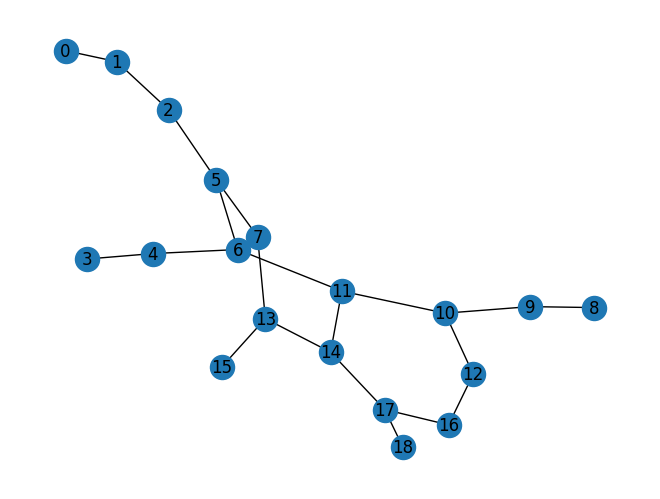

In [1]:
from pytket_mbqc_py import GraphCircuit
import networkx as nx

graph_circuit = GraphCircuit(
    n_physical_qubits=4,
    n_logical_qubits=19,
    vertex_is_dummy_list=[
        [True, False, True, True, False, False, True, True, True, False, True, False, False, False, True, True, True, False, True],
        [False, True, False, False, True, True, False, False, False, True, False, True, True, True, False, False, False, True, False]
    ]
)

input_string = (1,1,1)

input_0 = graph_circuit.add_graph_vertex(measurement_order=0)

# H[0]Z[0]
vertex_0_1 = graph_circuit.add_graph_vertex(measurement_order=1)
graph_circuit.add_edge(vertex_one=input_0, vertex_two=vertex_0_1)
graph_circuit.corrected_measure(vertex=input_0, t_multiple=4*input_string[0])

# H[0]
vertex_0_2 = graph_circuit.add_graph_vertex(measurement_order=3)
graph_circuit.add_edge(vertex_one=vertex_0_1, vertex_two=vertex_0_2)
graph_circuit.corrected_measure(vertex=vertex_0_1, t_multiple=0)

input_1 = graph_circuit.add_graph_vertex(measurement_order=2)

# H[1]Z[1]
vertex_1_1 = graph_circuit.add_graph_vertex(measurement_order=4)
graph_circuit.add_edge(vertex_one=input_1, vertex_two=vertex_1_1)
graph_circuit.corrected_measure(vertex=input_1, t_multiple=4*input_string[1])

# H[0]CZ[0,1]H[1]H[0]
vertex_0_3 = graph_circuit.add_graph_vertex(measurement_order=5)
vertex_1_2 = graph_circuit.add_graph_vertex(measurement_order=8)
graph_circuit.add_edge(vertex_one=vertex_0_2, vertex_two=vertex_0_3)
graph_circuit.add_edge(vertex_one=vertex_1_1, vertex_two=vertex_1_2)
graph_circuit.corrected_measure(vertex=vertex_0_2, t_multiple=0)
graph_circuit.corrected_measure(vertex=vertex_1_1, t_multiple=0)

vertex_0_4 = graph_circuit.add_graph_vertex(measurement_order=10)
graph_circuit.add_edge(vertex_one=vertex_0_3, vertex_two=vertex_0_4)

graph_circuit.add_edge(vertex_one=vertex_0_3, vertex_two=vertex_1_2)

graph_circuit.corrected_measure(vertex=vertex_0_3, t_multiple=0)

input_2 = graph_circuit.add_graph_vertex(measurement_order=6)

# H[2]Z[2]
vertex_2_1 = graph_circuit.add_graph_vertex(measurement_order=7)
graph_circuit.add_edge(vertex_one=input_2, vertex_two=vertex_2_1)
graph_circuit.corrected_measure(vertex=input_2, t_multiple=4*input_string[2])

# H[2]CZ[1,2]H[1]H[2]
vertex_2_2 = graph_circuit.add_graph_vertex(measurement_order=9)
graph_circuit.add_edge(vertex_one=vertex_2_1, vertex_two=vertex_2_2)
graph_circuit.corrected_measure(vertex=vertex_2_1, t_multiple=0)
vertex_1_3 = graph_circuit.add_graph_vertex(measurement_order=11)
graph_circuit.add_edge(vertex_one=vertex_1_2, vertex_two=vertex_1_3)
graph_circuit.corrected_measure(vertex=vertex_1_2, t_multiple=0)

vertex_2_3 = graph_circuit.add_graph_vertex(measurement_order=13)
graph_circuit.add_edge(vertex_one=vertex_2_2, vertex_two=vertex_2_3)
graph_circuit.add_edge(vertex_one=vertex_2_2, vertex_two=vertex_1_3)
graph_circuit.corrected_measure(vertex=vertex_2_2, t_multiple=0)

# H[0]CZ[0,1]H[0]H[1]
vertex_0_5 = graph_circuit.add_graph_vertex(measurement_order=12)
graph_circuit.add_edge(vertex_one=vertex_0_4, vertex_two=vertex_0_5)
graph_circuit.corrected_measure(vertex=vertex_0_4, t_multiple=0)

vertex_1_4 = graph_circuit.add_graph_vertex(measurement_order=14)
graph_circuit.add_edge(vertex_one=vertex_1_3, vertex_two=vertex_1_4)
graph_circuit.corrected_measure(vertex=vertex_1_3, t_multiple=0)

vertex_0_6 = graph_circuit.add_graph_vertex(measurement_order=None)
graph_circuit.add_edge(vertex_one=vertex_0_5, vertex_two=vertex_0_6)
graph_circuit.add_edge(vertex_one=vertex_0_5, vertex_two=vertex_1_4)
graph_circuit.corrected_measure(vertex=vertex_0_5, t_multiple=0)

# CZ[1,2]H[1]H[2]
vertex_2_4 = graph_circuit.add_graph_vertex(measurement_order=None)
graph_circuit.add_edge(vertex_one=vertex_2_3, vertex_two=vertex_2_4)
graph_circuit.corrected_measure(vertex=vertex_2_3, t_multiple=0)

vertex_1_5 = graph_circuit.add_graph_vertex(measurement_order=15)
graph_circuit.add_edge(vertex_one=vertex_1_4, vertex_two=vertex_1_5)
graph_circuit.corrected_measure(vertex=vertex_1_4, t_multiple=0)

# H[1]
vertex_1_6 = graph_circuit.add_graph_vertex(measurement_order=None)
graph_circuit.add_edge(vertex_one=vertex_1_5, vertex_two=vertex_1_6)
graph_circuit.add_edge(vertex_one=vertex_1_5, vertex_two=vertex_2_4)
graph_circuit.corrected_measure(vertex=vertex_1_5, t_multiple=0)

nx.draw(graph_circuit.entanglement_graph, with_labels=True)

In [2]:
from pytket.extensions.quantinuum import QuantinuumBackend, QuantinuumAPIOffline

device_name="H1-1"
backend = QuantinuumBackend(
    device_name=device_name,
#     api_handler=QuantinuumAPIOffline(),
)

In [3]:
import json

graph_circuit.corrected_measure(vertex=vertex_0_6, t_multiple=0)
graph_circuit.corrected_measure(vertex=vertex_1_6, t_multiple=0)
graph_circuit.corrected_measure(vertex=vertex_2_4, t_multiple=0)

n_shots = 1000
compiled_circuit = backend.get_compiled_circuit(circuit=graph_circuit)
handle = backend.process_circuit(
    circuit=compiled_circuit,
    n_shots=n_shots,
)
with open(f'{device_name}_handle.json', 'w') as fp:
    json.dump(str(handle), fp)

Enter your Quantinuum email: daniel.mills@quantinuum.com
Enter your Quantinuum password: ········


In [3]:
from pytket.backends.resulthandle import ResultHandle
import json

with open(f'{device_name}_handle.json', 'r') as fp:
    handle = ResultHandle.from_str(json.load(fp))

result = backend.get_result(handle=handle)
result.get_counts(
    cbits=graph_circuit.get_vertex_cbits(
        vertex_list=[vertex_0_6, vertex_1_6, vertex_2_4]
    ) + [graph_circuit.is_test_bit]
)

Enter your Quantinuum email: daniel.mills@quantinuum.com
Enter your Quantinuum password: ········


Counter({(1, 1, 0, 0): 480,
         (0, 0, 0, 1): 276,
         (0, 0, 1, 1): 38,
         (0, 1, 0, 1): 36,
         (1, 0, 0, 1): 34,
         (0, 1, 1, 1): 33,
         (1, 0, 1, 1): 30,
         (1, 1, 1, 1): 30,
         (1, 1, 0, 1): 27,
         (1, 0, 0, 0): 7,
         (1, 0, 1, 0): 4,
         (1, 1, 1, 0): 2,
         (0, 0, 1, 0): 1,
         (0, 1, 0, 0): 1,
         (0, 1, 1, 0): 1})

In [4]:
graph_circuit.get_failure_rate(result=result)

0.03571428571428571